In [ ]:
# italy 35 days

In [7]:
# add necessary imports
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 1000)

In [8]:
#Read the data
df_analyse=pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')  
df_analyse.sort_values('date',ascending=True).tail()

,Unnamed: 0,date,US,India,Germany,Italy,Australia
875,875,2022-06-15,85941290,43257730,27096571,17736696,7724035
876,876,2022-06-16,86057735,43270577,27124689,17773764,7753800
877,877,2022-06-17,86216418,43283793,27204953,17809934,7778643
878,878,2022-06-18,86230982,43296692,27204955,17844905,7801241
879,879,2022-06-19,86246101,43309473,27211896,17879160,7825659


In [9]:
# reference: https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/
# beta/gamma is denoted as basic reproduction number.

N= 10000000 #10000000 # max susceptible population = It is also the country's entire population
I0=df_analyse.Italy[35] # No. of days required to get a total infections of around 100.
R0=0
S0=N-(I0+R0)
# condition I0+S0+R0=N0


beta=0.4   # infection spread dynamics = It represents how many people can be infected from a single person. (here 0.4 means 4 people can get infected from 1 person)
gamma=0.1  # recovery rate

ydata = np.array(df_analyse.Italy[35:])
t=np.arange(len(ydata)) #time period


In [10]:
# SIR stands for S- susceptible, I - infected, R- recovered. The model suits perfectly for COVID scenario.
# NOTE: SIR model works on the assumption that recovered people will not get the infection again.
## SIR model has deifferential equations(ds_dt,dI_dt, dr_dt) to estimate future spread
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: infected rate
        gamma: recovery rate
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N    
    dI_dt=beta*S*I/N-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

#Integrate the SIR equations over the time grid, t.
def fit_odeint(x, beta, gamma):
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI

In [49]:
# the resulting curve has to be fitted
# free parameters are here beta and gamma
popt=[0.4,0.1]
fitted1 = fit_odeint(t, *popt)
fitted1

array([ 4.53000000e+02,  6.11472505e+02,  8.25375142e+02,  1.11408944e+03,
        1.50376833e+03,  2.02969734e+03,  2.73947553e+03,  3.69729751e+03,
        4.98971222e+03,  6.73335776e+03,  9.08533165e+03,  1.22570612e+04,
        1.65327941e+04,  2.22941377e+04,  3.00524241e+04,  4.04910300e+04,
        5.45200532e+04,  7.33457476e+04,  9.85565286e+04,  1.32225558e+05,
        1.77025933e+05,  2.36346863e+05,  3.14385933e+05,  4.16171853e+05,
        5.47443692e+05,  7.14281611e+05,  9.22366615e+05,  1.17577529e+06,
        1.47533555e+06,  1.81681089e+06,  2.18949688e+06,  2.57602124e+06,
        2.95396897e+06,  3.29928141e+06,  3.59048531e+06,  3.81230109e+06,
        3.95746959e+06,  4.02651480e+06,  4.02600115e+06,  3.96619113e+06,
        3.85886287e+06,  3.71568468e+06,  3.54722150e+06,  3.36246500e+06,
        3.16872323e+06,  2.97171983e+06,  2.77579360e+06,  2.58412941e+06,
        2.39898171e+06,  2.22187316e+06,  2.05376184e+06,  1.89517761e+06,
        1.74633079e+06,  

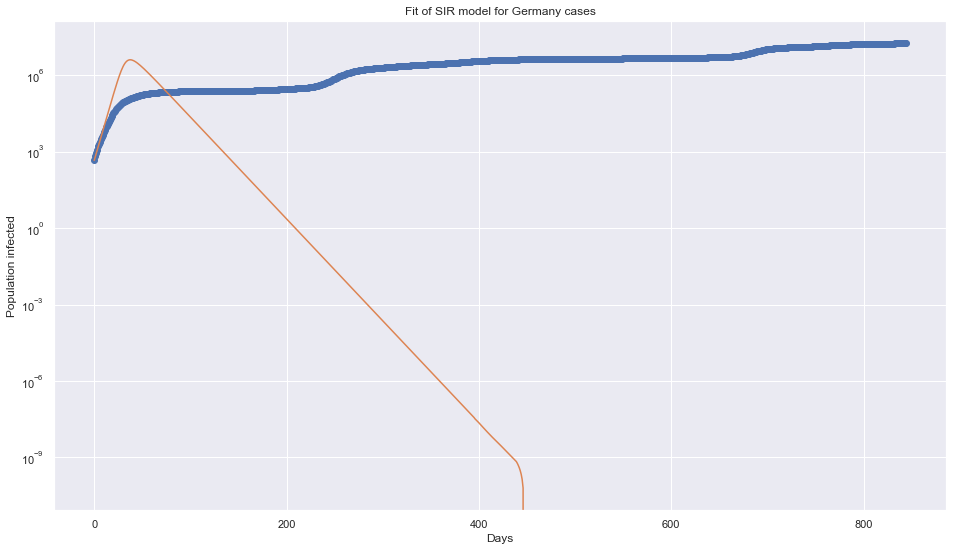

Optimal parameters: beta = 0.4  and gamma =  0.1
Basic Reproduction Number R0  4.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [50]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted1)
plt.title("Fit of SIR model for Germany cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")

In [13]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])



C:\Users\Dheeraj\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\Dheeraj\AppData\Local\Temp/ipykernel_4304/3720643878.py:20: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N
C:\Users\Dheeraj\AppData\Local\Temp/ipykernel_4304/3720643878.py:21: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N-gamma*I
C:\Users\Dheeraj\AppData\Local\Temp/ipykernel_4304/3720643878.py:22: RuntimeWarning: overflow encountered in double_scalars
  dR_dt=gamma*I
C:\Users\Dheeraj\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


standard deviation errors :  [1.46036520e-04 8.01591933e-05]  start infect: 453
Optimal parameters: beta = 0.013300501903016184  and gamma =  -0.0026756036507047205


In [14]:
# get the final fitted curve
fitted=fit_odeint(t, *popt)

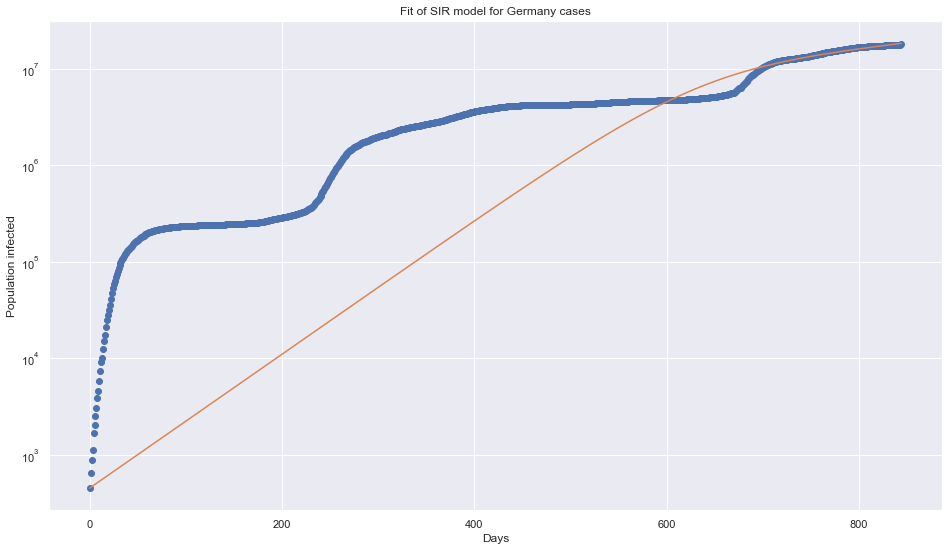

Optimal parameters: beta = 0.013300501903016184  and gamma =  -0.0026756036507047205
Basic Reproduction Number R0  -4.971028462871546
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [15]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for Germany cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")

In [21]:
SIR_Italy = np.concatenate([np.zeros(35,dtype=float), fitted])

In [22]:
df_analyse['SIR_Italy'] = SIR_Italy
data_path='../data/processed/small_table_updated.csv'

#df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';',index=False)
df_analyse.to_csv(data_path, sep=';')

In [24]:
df_analyse=pd.read_csv('../data/processed/small_table_updated.csv',sep=';', index_col=False)  
df_analyse.sort_values('date',ascending=True).tail()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,date,US,India,Germany,Italy,Australia,SIR_Italy,SIR_Germany
875,875,875,875,875,2022-06-15,85941290,43257730,27096571,17736696,7724035,1.817410e+07,2.955172e+07
876,876,876,876,876,2022-06-16,86057735,43270577,27124689,17773764,7753800,1.822659e+07,2.971245e+07
877,877,877,877,877,2022-06-17,86216418,43283793,27204953,17809934,7778643,1.827915e+07,2.987398e+07
878,878,878,878,878,2022-06-18,86230982,43296692,27204955,17844905,7801241,1.833177e+07,3.003630e+07
879,879,879,879,879,2022-06-19,86246101,43309473,27211896,17879160,7825659,1.838445e+07,3.019943e+07


In [ ]:
df_analyse = df_analyse.drop(columns={'Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0.1.1.1'})

In [37]:
df_analyse

,date,US,India,Germany,Italy,Australia,SIR_Italy,SIR_Germany
0,2020-01-22,1,0,0,0,0,0.000000e+00,0.000000e+00
1,2020-01-23,1,0,0,0,0,0.000000e+00,0.000000e+00
2,2020-01-24,2,0,0,0,0,0.000000e+00,0.000000e+00
3,2020-01-25,2,0,0,0,0,0.000000e+00,0.000000e+00
4,2020-01-26,5,0,0,0,4,0.000000e+00,0.000000e+00
5,2020-01-27,5,0,1,0,5,0.000000e+00,0.000000e+00
6,2020-01-28,5,0,4,0,5,0.000000e+00,0.000000e+00
7,2020-01-29,6,0,4,0,6,0.000000e+00,0.000000e+00
8,2020-01-30,6,1,4,0,9,0.000000e+00,0.000000e+00
9,2020-01-31,8,1,5,2,9,0.000000e+00,0.000000e+00


In [38]:
df_analyse.to_csv(data_path, sep=';', index=False)

In [39]:
df_analyse=pd.read_csv('../data/processed/small_table_updated.csv',sep=';', index_col=False)  
df_analyse.sort_values('date',ascending=True).tail()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,date,US,India,Germany,Italy,Australia,SIR_Italy,SIR_Germany
875,875,875,875,875,2022-06-15,85941290,43257730,27096571,17736696,7724035,1.817410e+07,2.955172e+07
876,876,876,876,876,2022-06-16,86057735,43270577,27124689,17773764,7753800,1.822659e+07,2.971245e+07
877,877,877,877,877,2022-06-17,86216418,43283793,27204953,17809934,7778643,1.827915e+07,2.987398e+07
878,878,878,878,878,2022-06-18,86230982,43296692,27204955,17844905,7801241,1.833177e+07,3.003630e+07
879,879,879,879,879,2022-06-19,86246101,43309473,27211896,17879160,7825659,1.838445e+07,3.019943e+07


In [40]:
data_path='../data/processed/small_table_updated.csv'
df_analyse.to_csv(data_path, sep=';', index=False)

In [42]:
df_analyse=pd.read_csv('../data/processed/small_table_updated.csv',sep=';', index_col=False)  
df_analyse.sort_values('date',ascending=True).tail()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,date,US,India,Germany,Italy,Australia,SIR_Italy,SIR_Germany
875,875,875,875,875,2022-06-15,85941290,43257730,27096571,17736696,7724035,1.817410e+07,2.955172e+07
876,876,876,876,876,2022-06-16,86057735,43270577,27124689,17773764,7753800,1.822659e+07,2.971245e+07
877,877,877,877,877,2022-06-17,86216418,43283793,27204953,17809934,7778643,1.827915e+07,2.987398e+07
878,878,878,878,878,2022-06-18,86230982,43296692,27204955,17844905,7801241,1.833177e+07,3.003630e+07
879,879,879,879,879,2022-06-19,86246101,43309473,27211896,17879160,7825659,1.838445e+07,3.019943e+07


In [43]:
df_analyse

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,date,US,India,Germany,Italy,Australia,SIR_Italy,SIR_Germany
0,0,0,0,0,2020-01-22,1,0,0,0,0,0.000000e+00,0.000000e+00
1,1,1,1,1,2020-01-23,1,0,0,0,0,0.000000e+00,0.000000e+00
2,2,2,2,2,2020-01-24,2,0,0,0,0,0.000000e+00,0.000000e+00
3,3,3,3,3,2020-01-25,2,0,0,0,0,0.000000e+00,0.000000e+00
4,4,4,4,4,2020-01-26,5,0,0,0,4,0.000000e+00,0.000000e+00
5,5,5,5,5,2020-01-27,5,0,1,0,5,0.000000e+00,0.000000e+00
6,6,6,6,6,2020-01-28,5,0,4,0,5,0.000000e+00,0.000000e+00
7,7,7,7,7,2020-01-29,6,0,4,0,6,0.000000e+00,0.000000e+00
8,8,8,8,8,2020-01-30,6,1,4,0,9,0.000000e+00,0.000000e+00
9,9,9,9,9,2020-01-31,8,1,5,2,9,0.000000e+00,0.000000e+00


In [44]:
df_analyse_deleted = df_analyse.drop(columns={'Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0.1.1.1'})
df_analyse_deleted

,date,US,India,Germany,Italy,Australia,SIR_Italy,SIR_Germany
0,2020-01-22,1,0,0,0,0,0.000000e+00,0.000000e+00
1,2020-01-23,1,0,0,0,0,0.000000e+00,0.000000e+00
2,2020-01-24,2,0,0,0,0,0.000000e+00,0.000000e+00
3,2020-01-25,2,0,0,0,0,0.000000e+00,0.000000e+00
4,2020-01-26,5,0,0,0,4,0.000000e+00,0.000000e+00
5,2020-01-27,5,0,1,0,5,0.000000e+00,0.000000e+00
6,2020-01-28,5,0,4,0,5,0.000000e+00,0.000000e+00
7,2020-01-29,6,0,4,0,6,0.000000e+00,0.000000e+00
8,2020-01-30,6,1,4,0,9,0.000000e+00,0.000000e+00
9,2020-01-31,8,1,5,2,9,0.000000e+00,0.000000e+00


In [48]:
df_analyse_delerdfefdf=pd.read_csv('../data/processed/small_table_updated.csv',sep=';', index_col=False)  
df_analyse_delerdfefdf.sort_values('date',ascending=True).tail()

,date,US,India,Germany,Italy,Australia,SIR_Italy,SIR_Germany
875,2022-06-15,85941290,43257730,27096571,17736696,7724035,1.817410e+07,2.955172e+07
876,2022-06-16,86057735,43270577,27124689,17773764,7753800,1.822659e+07,2.971245e+07
877,2022-06-17,86216418,43283793,27204953,17809934,7778643,1.827915e+07,2.987398e+07
878,2022-06-18,86230982,43296692,27204955,17844905,7801241,1.833177e+07,3.003630e+07
879,2022-06-19,86246101,43309473,27211896,17879160,7825659,1.838445e+07,3.019943e+07


In [47]:
data_path='../data/processed/small_table_updated.csv'
df_analyse_deleted.to_csv(data_path, sep=';', index=False)